<a href="https://colab.research.google.com/github/jeekyung/ESAA/blob/main/ESAA_OB_week14_%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_ch4_1~3_pg_142~181.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PART 04 합성곱 신경망(CNN)**
---

## **01 합성곱 신경망**
---

>합성곱 신경망(CNN : Convolutional Neural Network)은 데이터가 가진 특징들의 패턴을 학습하는 알고리즘으로, 컴퓨터 비전 분야에서 많이 사용됨.<br/>
이미지 분류(Image Classification), 객체 탐지(Object Detection), 스타일 전이(Style Transfer) 등

**이미지 분류**

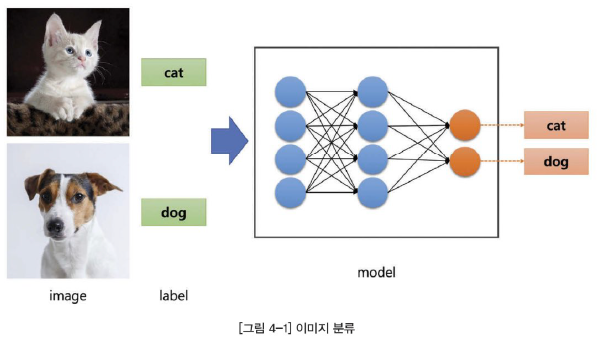

**객체 탐지**

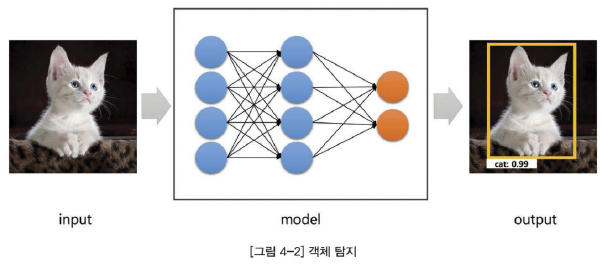

* 이미지에서 특정 객체 인식, 위치 파악.
* 노란색 실선: 경계 박스(bounding box)

### **1-1 이미지 표현**
---

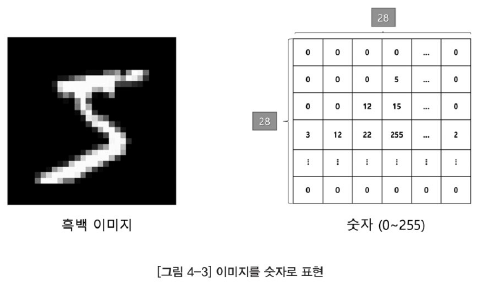

* 0~255 사이의 숫자로 각 픽셀의 화소 값을 나타내는 방식으로 표현함<br/>
0: 검은색, 255: 흰색

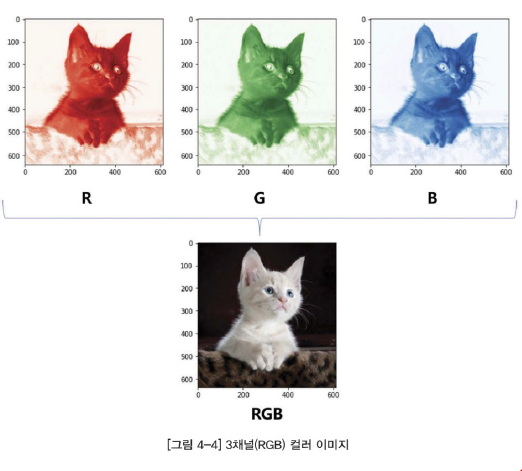

* 컬러 이미지는 R(빨강), G(초록), B(파랑) 채널로 구성된 3장의 이미지 겹쳐서 표현

### **1-2 합성곱(Convolution)**
---

>합성곱 연산: 입력 이미지에 대하여 일반적으로 정방형 크기를 가지는 커널(kernel)을 사용하여, 입력 이미지에 대한 특성을 추출하는 방법<br/>
합성곱 연산을 통해서 추출된 이미지를 특성맵(feature map)이라고 부름

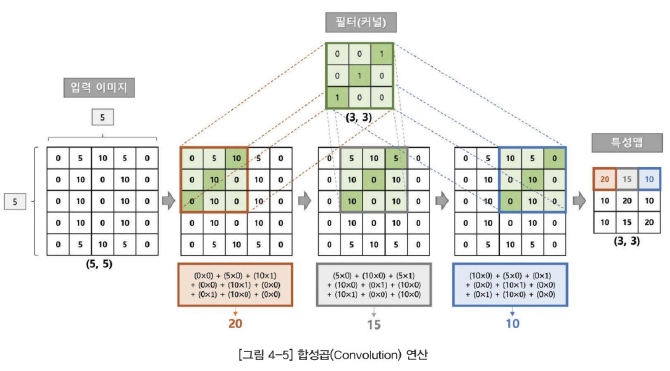

>이미지에 필터를 적용하는 합성곱 연산 설명:
* 입력 이미지의 크기는 (세로,가로) 순서로 shape이 출력됨
* 이러한 입력 이미지의 좌측 상단부터 커널과 같은 크기를 갖도록 입력 이미지의 일부분에 커널이 겹치도록 투영
* 이렇게 입력 이미지와 커널이 겹치는 부분에 대하여 합성곱 연산 수행
* 합성곱 연산은 element-wise 곱셈 연산 수행 후 모두 더한 단일 스칼라 값이 나옴
* 이렇게 나온 결과는 추출된 이미지인 feature map의 좌측 상단의 첫번째 값이 됨

* 커널 사이즈가 3 x 3인 경우 총 9개의 가중치(weight)를 가지며 오차 역전파(back propagation) 시 커널의 가중치 업데이트
* 합성곱 신경망이 이미지 특성 추출에 효율적인 이유: 커널의 공유 가중치(shared weights) 때문.
* 장점: 오차 역전파 시 커널의 그래디언트(gradient)를 계산할 때 9개에 대해서만 업데이트하면 되므로 완전 연결층을 사용할 때보다 연산량 훨씬 적음

### **1-3 채널(channel)**
---

>* 채널: 입력 이미지를 구성하는 2차원 배열의 개수
* 흑백 이미지는 단일 채널, 즉 채널의 개수가 1개인 이미지
* 컬러 이미지는 R,G,B 3개의 채널을 가지는 이미지
* 컬러 이미지가 세로 5픽셀, 가로 5픽셀일 경우 shape: (5,5,3)


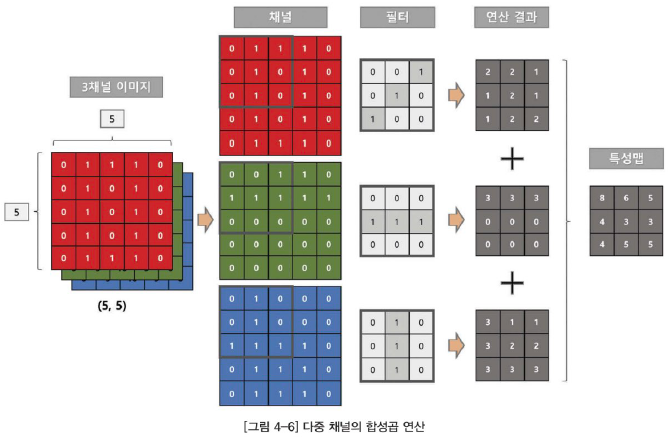

* 컬러 이미지와 같이 입력 이미지가 여러 개의 채널을 가지는 경우, 합성곱 연산을 수행할 때 특성 맵의 생산과정을 잘 살펴봐야 함.
* 우선 입력 이미지의 채널 개수만큼 커널이 생성되고, 각 채널마다 하나씩 커널을 적용하여 합성곱 연산 수행함
* 이 과정을 거치면 입력 이미지의 채널 개수만큼 합성곱 연산된 결과가 생성됨
* element-wise 덧셈 연산으로 모두 더해주면 최종 특성맵 생성됨

* 만약 합성곱 레이어에 출력 필터의 개수를 200개로 설정했다면, 입력 이미지의 채널 개수 3개와 출력 필터의 개수 20개가 곱해져서 총 60개의 커널 생성됨
* 1개 커널의 사이즈가 3 x 3으로 설정됐으면, (3 x 3 x 입력 채널 수 x 출력 필터 수) = 3 x 3 x 3개(R,G,B) x 20개(출력 필터 수) = 540개
* 여기에 bias가 추가로 계산되는데 20개의 출력 필터 개수만큼 추가됨(총 560개)

### **1-4 스트라이드(stride)**
---

>커널은 좌측 상단으로부터 입력 이미지를 기준으로 우측으로 이동하며 합성곱 연산을 계속 수행하고 특성맵에 결과를 채워나감<br/>
이때 이동하는 간격을 스트라이드(stride)로 정의하며, 주로 1 또는 2로 설정

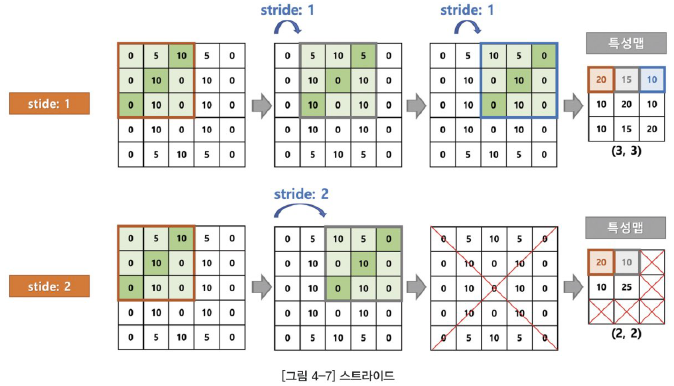

* 스트라이드를 1로 설정 시: 커널이 입력 이미지의 우측 끝까지 이동했다면 아래 방향으로 1칸 좌측 첫번째 픽셀로 이동하여 추출함
* 스트라이드를 2로 설정 시 2 픽셀씩 건너뛰어 특성맵의 크기가 1/2로 줄어든다.

### **1-5 패딩(padding)**
---

* 추출된 특성맵의 크기가 입력 이미지 대비 줄어들지 않도록 패딩(padding) 설정 가능

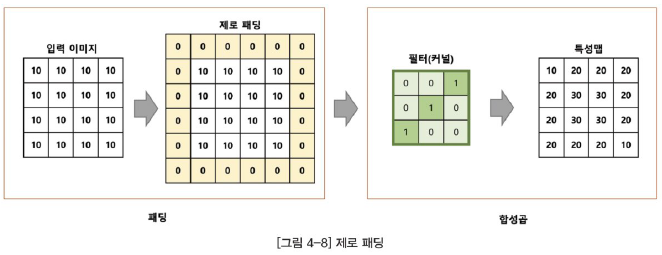

* 일반적으로 zero-padding을 사용하며, 입력 이미지의 가장자리에 0으로 채워진 패딩 값으로 채운 후 추출함.
* 패딩을 적용한 후 합성곱 연산을 수행하게 되면 특성맵의 크기가 줄어들지 않음

### **1-6 특성맵(feature map) 사이즈**
---

패딩과 스트라이드를 적용한 뒤 입력 데이터와 필터의 크기가 주어졌을 때 출력 데이터의 크기를 구하는 식:<br/>
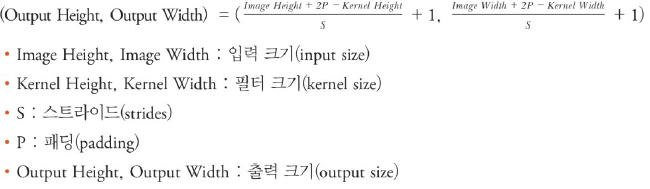

### **1-7 풀링(pooling)**
---

>풀링(pooling) 레이어는 추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어<br/>
장점:
* 이미지 축소를 통해 연산량 감소
* 과대적합(overfitting) 방지

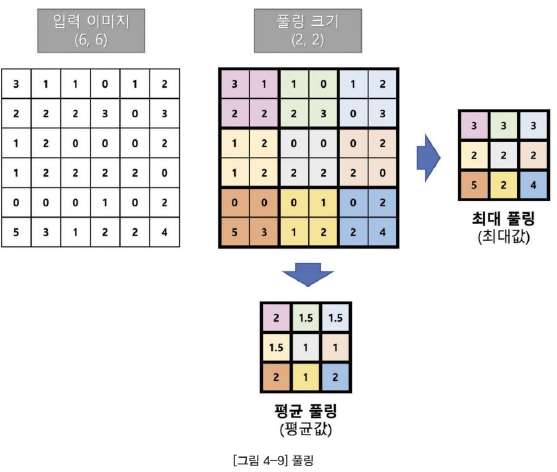

>풀링 레이어는 최대 풀링(max pooling)과 평균 풀링(average pooling)으로 나뉨
* 최대 풀링 수행 시 커널의 크기가 2 x 2로 주어질 때 입력 이미지의 2 x 2 픽셀 중 최대값이 출력값으로 선택됨
* 풀링 레이어도 스트라이드 값을 가지며 스트라이드를 2로 설정하면 2칸씩 건너뛰면서 풀링 수행

## **02 간단한 모델 생성**
---

### **2-1 데이터 로드 및 전처리**
---

In [1]:
# tensorflow 모듈 import
import tensorflow as tf

In [2]:
# mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_valid,y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


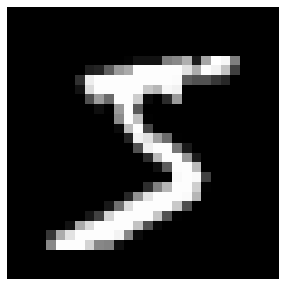

In [3]:
# 훈련 세트의 첫번째 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx],cmap="gray")
  plt.axis("off")
  plt.show()

plot_image(x_train,0)

In [4]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [5]:
# 정규화(Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

#0~1 범위로 스케일이 정규화됨
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


* mnist 데이터셋은 색상을 나타내는 채널이 1개인 모노 컬러 이미지로 구성됨.
* CNN 모델에 주입하기 위해서 색상을 나타내는 채널 추가

In [6]:
# 채널 추가
print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


### **Sequential API로 모델 생성 및 학습**
---

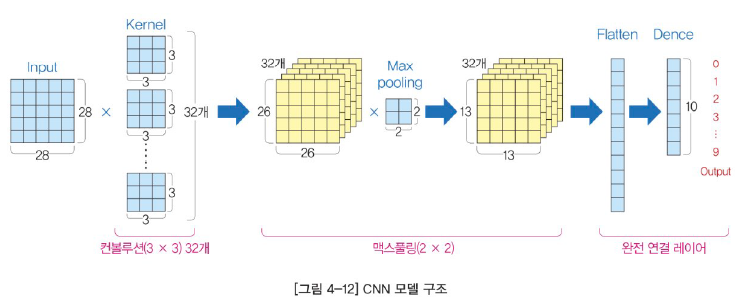

* Sequential API를 사용하여 합성곱 레이어 1개, 풀링 레이어 1개를 적용하는 간단한 모델 생성
* 최종 분류기로 Dense 레이어를 적용하기 위해 Flatten 층을 추가하여 1차원 배열로 펼쳐줌
* 합성곱은 Conv2D 레이어를 사용하고 (3,3) 크기의 서로 다른 32가지 종류의 커널 적용함
* ReLU 활성화 함수를 적용하고 name 속성 레이어 이름을 'conv'라 지정해줌.

In [7]:
# Sequential API를 사용해 샘플 모델 생성
model = tf.keras.Sequential([
    # Convolution 적용(32 filters)
    tf.keras.layers.Conv2D(32,(3,3), activation='relu',
                           input_shape=(28,28,1),name='conv'),
    # Max Pooling 적용
    tf.keras.layers.MaxPooling2D((2,2), name='pool'),
    # Classifier 출력층
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [8]:
# 모델 컴파일
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train,
                    validation_data=(x_valid_in, y_valid),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2127 - accuracy: 0.9392 - val_loss: 0.0896 - val_accuracy: 0.9740
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0791 - accuracy: 0.9770 - val_loss: 0.0725 - val_accuracy: 0.9768
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0609 - accuracy: 0.9821 - val_loss: 0.0591 - val_accuracy: 0.9803
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0500 - accuracy: 0.9850 - val_loss: 0.0612 - val_accuracy: 0.9802
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0433 - accuracy: 0.9873 - val_loss: 0.0557 - val_accuracy: 0.9821
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0363 - accuracy: 0.9891 - val_loss: 0.0592 - val_accuracy: 0.9817
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0318 - accuracy: 0.9901 - val_loss: 0.0555 - val_accurac

In [9]:
# 모델의 학습된 가중치를 사용하여 검증 세트의 손실과 평가지표 계산
model.evaluate(x_valid_in,y_valid)

313/313 [==============================] - 1s 4ms/step - loss: 0.0548 - accuracy: 0.9838


[0.05484864488244057, 0.9837999939918518]

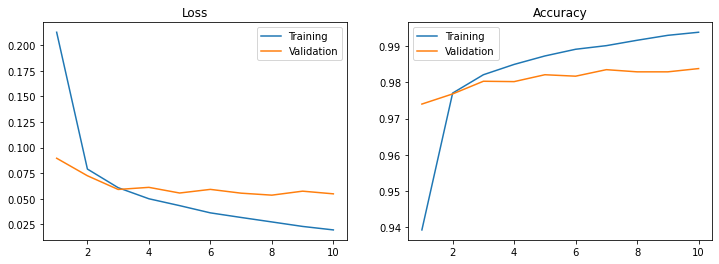

In [10]:
# 모델 훈련 단계에서 훈련 결과를 저장해 둔 history 객체.
def plot_loss_acc(history, epoch):

  loss, val_loss = history.history['loss'], history.history['val_loss']
  acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

  fig, axes = plt.subplots(1,2,figsize=(12,4))

  axes[0].plot(range(1, epoch + 1), loss, label='Training')
  axes[0].plot(range(1, epoch + 1), val_loss, label='Validation')
  axes[0].legend(loc='best')
  axes[0].set_title('Loss')

  axes[1].plot(range(1, epoch + 1), acc, label='Training')
  axes[1].plot(range(1, epoch + 1), val_acc, label='Validation')
  axes[1].legend(loc='best')
  axes[1].set_title('Accuracy')

  plt.show()

plot_loss_acc(history, 10)

* 훈련 세트에 대한 손실은 계속 줄어드는데 검증 세트의 손실은 어느 수준에서 더이상 낮아지지 않음
* 4 epoch 이후부터는 모델이 과대적합 되었음을 확인 가능

### **2-3 모델 구조 파악**
---

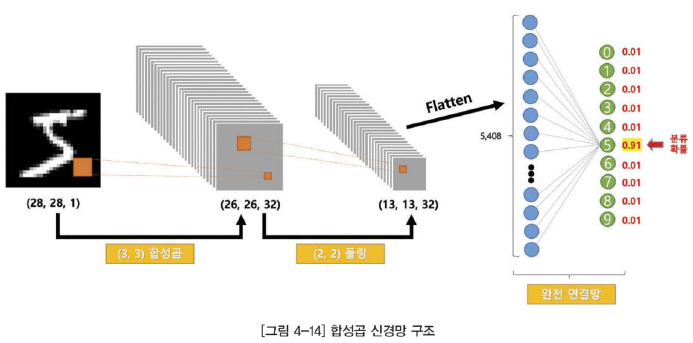

In [11]:
# 모델 구조 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 입력 텐서 형태
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [13]:
# 출력 텐서 형태
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [14]:
# 모델 구성하는 레이어 추출
model.layers

In [15]:
# 첫번째 레이어 선택
model.layers[0]

In [16]:
# 첫번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [17]:
# 첫번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [18]:
# 첫번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 3.28261733e-01, -4.93610919e-01, -4.47453141e-01,
           -1.05736040e-01,  5.73619083e-02,  5.27826190e-01,
           -7.80773103e-01, -4.24002022e-01,  2.54042685e-01,
           -9.37869728e-01,  2.64922202e-01,  3.15914124e-01,
            3.25486600e-01,  2.29497701e-01, -9.67025101e-01,
           -6.58794463e-01, -4.45609897e-01, -4.67020571e-02,
            3.40345681e-01,  2.35603005e-01,  3.15956920e-01,
            1.69243023e-01, -2.20745385e-01, -5.06996401e-02,
           -1.77142575e-01, -1.37773573e-01, -2.92587131e-01,
           -9.09661576e-02,  1.38426125e-01, -6.00413233e-02,
            3.24703693e-01, -4.27986115e-01]],
 
         [[ 1.74445406e-01, -1.58562735e-01, -8.79568815e-01,
            4.30197239e-01,  1.69456586e-01,  3.74949813e-01,
           -2.20954195e-01,  6.52614981e-02,  2.39149004e-01,
           -9.74355042e-01,  4.92278695e-01,  2.55729496e-01,
           

In [19]:
# 첫번째 레이어 커널 가중치만 따로 선택도 가능
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 3.28261733e-01, -4.93610919e-01, -4.47453141e-01,
          -1.05736040e-01,  5.73619083e-02,  5.27826190e-01,
          -7.80773103e-01, -4.24002022e-01,  2.54042685e-01,
          -9.37869728e-01,  2.64922202e-01,  3.15914124e-01,
           3.25486600e-01,  2.29497701e-01, -9.67025101e-01,
          -6.58794463e-01, -4.45609897e-01, -4.67020571e-02,
           3.40345681e-01,  2.35603005e-01,  3.15956920e-01,
           1.69243023e-01, -2.20745385e-01, -5.06996401e-02,
          -1.77142575e-01, -1.37773573e-01, -2.92587131e-01,
          -9.09661576e-02,  1.38426125e-01, -6.00413233e-02,
           3.24703693e-01, -4.27986115e-01]],

        [[ 1.74445406e-01, -1.58562735e-01, -8.79568815e-01,
           4.30197239e-01,  1.69456586e-01,  3.74949813e-01,
          -2.20954195e-01,  6.52614981e-02,  2.39149004e-01,
          -9.74355042e-01,  4.92278695e-01,  2.55729496e-01,
           1.97856218e-01,  

In [20]:
# 첫번째 레이어 커널 bias만 따로 선택도 가능
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.32989562,  0.00342725, -0.05791858,  0.00948268, -0.26249513,
       -0.001285  , -0.11277423, -0.11359838, -0.02214971,  0.00210192,
        0.16269742, -0.2999407 , -0.2766054 , -0.08724619,  0.08283726,
       -0.27191338, -0.17908719, -0.12445874, -0.20440638, -0.24182363,
       -0.34684023, -0.2917592 , -0.00826386, -0.05084305, -0.21358678,
       -0.17983124, -0.06853666, -0.010419  , -0.20982009, -0.23514539,
       -0.16789939, -0.024156  ], dtype=float32)>

In [21]:
# 레이어 이름 사용하여 레이어 선택
model.get_layer('conv')

In [22]:
# 모델에 입력 데이터를 넣어주고,
# 모델의 첫번째와 두 번째 레이어의 출력을 최종 출력으로 갖는 activator 모델 정의

# 샘플 이미지의 레이어별 출력을 리스트에 추가(첫 번째, 두 번째 레이어)
activator = tf.keras.Model(inputs=model.input,
                           outputs=[layer.output for layer in model.layers[:2]])
activations = activator.predict(x_train_in[0][tf.newaxis,...])

len(activations)

1/1 [==============================] - 0s 81ms/step


2

In [23]:
# 첫 번째 레이어(conv) 출력층
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

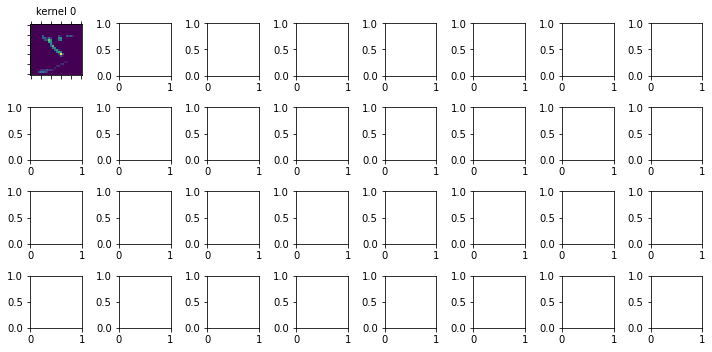

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [24]:
# Convolution 시각화
fig,axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
  axes[i//8, i%8].matshow(conv_activation[0,:,:,i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8,i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8,i%8].get_yticklabels(),visible=False)

  plt.tight_layout()
  plt.show()

In [25]:
# 두 번째 레이어는 최대 풀링 레이어
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


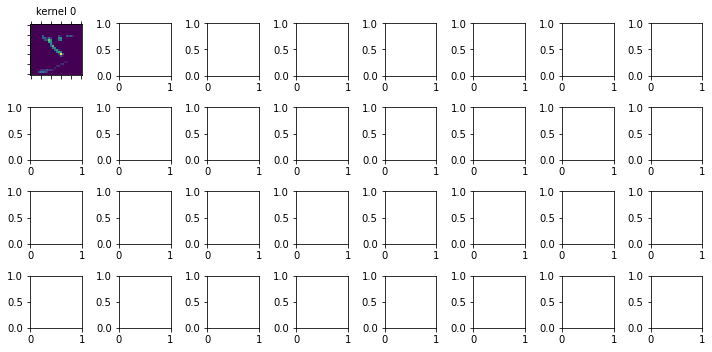

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [26]:
# 시각화
fig,axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
  axes[i//8, i%8].matshow(conv_activation[0,:,:,i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8,i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8,i%8].get_yticklabels(),visible=False)

  plt.tight_layout()
  plt.show()

## **03 복잡한 모델 생성**
---

### **3-1 데이터셋 준비**
---

In [27]:
import tensorflow as tf
import numpy as np

In [28]:
# mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_valid,y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


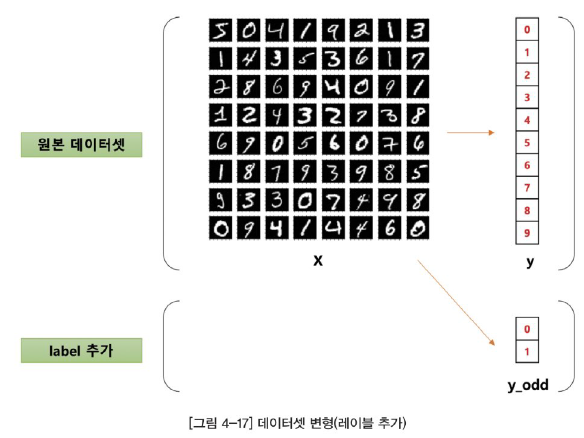

* 0~9까지 숫자를 맞추는 정답 외에 홀수인지 짝수인지를 판단하는 정답(y_odd)을 새로 만들어서 추가.

In [29]:
# 새로운 출력 값 배열 생성(홀수 : 1, 짝수 : 0)
y_train_odd = []
for y in y_train:
  if y % 2 ==0:
    y_train_odd.append(0)
  else:
    y_train_odd.append(1)
  
y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [30]:
# 원본 y_train 배열과 홀짝으로 분류한 y_train_odd 배열을 동시에 출력하여 비교해보면
# 홀짝 여부가 잘 정리된 것 확인 가능
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [31]:
# validation 데이터세트 처리
y_valid_odd = []
for y in y_valid:
  if y % 2 ==0:
    y_valid_odd.append(0)
  else:
    y_valid_odd.append(1)
  
y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [32]:
# 정규화(Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

# 채널 추가
x_train_in = tf.expand_dims(x_train, -1)
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


### **3-2 Functional API로 다중 입력, 다중 출력 레이어 생성**
---

In [34]:
# Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28,28,1))

conv = tf.keras.layers.Conv2D(32,(3,3),activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs=tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat,flat_inputs])
outputs = tf.keras.layers.Dense(10,activation='softmax')(concat)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 32)   320         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 flatten_1 (Flatten)            (None, 5408)         0           ['max_pooling2d[0][0]']          
                                                                                            

In [37]:
!pip install wrappers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement wrappers (from versions: 0.1.0, 0.1.1, 0.1.2, 0.1.3, 0.1.4, 0.1.5, 0.1.6, 0.1.7, 0.1.8, 0.1.9)
ERROR: No matching distribution found for wrappers


In [35]:
# 모델 구조 출력 및 이미지 파일로 저장
from tensorflow.python.keras.utils.vis_utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

ImportError: ignored

In [38]:
# 모델 컴파일
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train,
                    validation_data=(x_valid_in, y_valid),
                    epochs=10)

# 모델 성능
val_loss,val_acc = model.evaluate(x_valid_in,y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2020 - accuracy: 0.9431 - val_loss: 0.0853 - val_accuracy: 0.9739
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0768 - accuracy: 0.9776 - val_loss: 0.0608 - val_accuracy: 0.9796
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0583 - accuracy: 0.9829 - val_loss: 0.0618 - val_accuracy: 0.9790
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0491 - accuracy: 0.9847 - val_loss: 0.0598 - val_accuracy: 0.9809
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0404 - accuracy: 0.9873 - val_loss: 0.0603 - val_accuracy: 0.9809
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0340 - accuracy: 0.9895 - val_loss: 0.0563 - val_accuracy: 0.9819
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0294 - accuracy: 0.9908 - val_loss: 0.0548 - val_accuracy:

### **3-3 다중 출력 분류 모델**
---

* 2가지 서로 다른 분류 문제를 예측하는 다중 출력 모델 생성.
* 0~9까지 숫자를 맞추는 분류 문제와 홀짝을 맞추는 분류 문제를 동시에 풀어내는 모델 정의

In [43]:
# Functional API를 사용해 모델 생성

inputs = tf.keras.layers.Input(shape=(28,28,1), name='inputs')

conv = tf.keras.layers.Conv2D(32,(3,3),activation='relu',name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2), name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(1,activation='softmax',name='digit_dense')(concat)

odd_outputs=tf.keras.layers.Dense(1,activation='sigmoid',name='odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs=inputs,outputs=[digit_outputs,odd_outputs])

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_layer (Conv2D)          (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 maxpool_layer (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d_layer[0][0]']           
                                                                                                  
 flatten_layer (Flatten)        (None, 5408)         0           ['maxpool_layer[0][0]']          
                                                                                            

In [44]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

In [50]:
# 모델 컴파일
model.compile(optimizer='adam', loss={'digit_dense':'sparse_categorical_crossentropy',
             'odd_dense':'binary_crossentropy'},
              loss_weights={'digit_dense':1, 'odd_dense':0.5},
              # loss = 1.0 * sparse_categorical_crossentropy + 0.5 * binary_crossentropy
              metrics=['accuracy'])
# 모델 훈련
history = model.fit({'inputs':x_train_in},{'digit_dense':y_train,'odd_dense':y_train_odd},
                     validation_data=({'inputs':x_valid_in}, {'digit_dense':y_valid,
                    'odd_dense':y_valid_odd}),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: nan - digit_dense_loss: nan - odd_dense_loss: 0.3276 - digit_dense_accuracy: 0.0987 - odd_dense_accuracy: 0.8630 - val_loss: nan - val_digit_dense_loss: nan - val_odd_dense_loss: 0.2751 - val_digit_dense_accuracy: 0.0980 - val_odd_dense_accuracy: 0.8906
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: nan - digit_dense_loss: nan - odd_dense_loss: 0.2722 - digit_dense_accuracy: 0.0987 - odd_dense_accuracy: 0.8906 - val_loss: nan - val_digit_dense_loss: nan - val_odd_dense_loss: 0.2636 - val_digit_dense_accuracy: 0.0980 - val_odd_dense_accuracy: 0.8973
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: nan - digit_dense_loss: nan - odd_dense_loss: 0.2628 - digit_dense_accuracy: 0.0987 - odd_dense_accuracy: 0.8961 - val_loss: nan - val_digit_dense_loss: nan - val_odd_dense_loss: 0.2598 - val_digit_dense_accuracy: 0.0980 - val_odd_dense_accuracy: 0.8994
Epoch 4/1

In [53]:
# 모델 성능
model.evaluate({'inputs':x_valid_in},{'digit_dense':y_valid,'odd_dense':y_valid_odd})

313/313 [==============================] - 1s 3ms/step - loss: nan - digit_dense_loss: nan - odd_dense_loss: 0.2546 - digit_dense_accuracy: 0.0980 - odd_dense_accuracy: 0.9012


[nan, nan, 0.2546408772468567, 0.09799999743700027, 0.901199996471405]

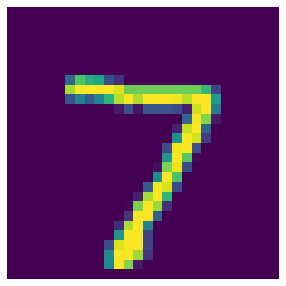

In [52]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx])
  plt.axis("off")
  plt.show()

plot_image(x_valid,0)

In [54]:
# 검증 데이터셋의 모든 이미지 데이터를 입력하여 2개의 분류 문제에 대한 예측 확률 구하기
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

313/313 [==============================] - 1s 2ms/step
[nan]
[0.99962115]


In [55]:
digit_labels = np.argmax(digit_preds, axis=-1)
digit_labels[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [56]:
odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1,-1)[0]
odd_labels[0:10]

<ipython-input-56-067746257099>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1,-1)[0]


array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

### **3-4 전이 학습(Transfer Learning)**
---

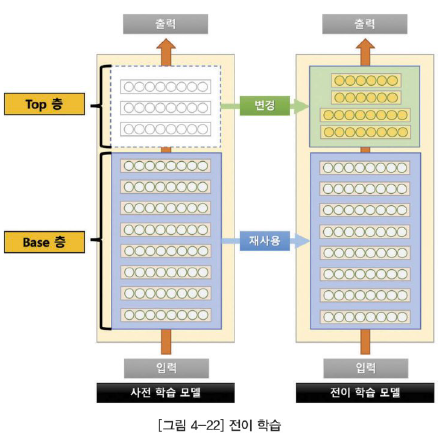

* 전이 학습(Transfer Learning): 기존에 학습된 모델을 활용해 새로운 모델을 만들어내는 개념

In [57]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

In [60]:
# Sequential API 적용
digit_model = tf.keras.Sequential([
                                  base_model,
                                  tf.keras.layers.Dense(10,activation='softmax'),
                                   ])
digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')

In [62]:
# 모델 컴파일
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train,
                    validation_data=(x_valid_in, y_valid),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: nan - digit_dense_loss: nan - odd_dense_loss: nan - digit_dense_accuracy: 0.0987 - odd_dense_accuracy: 0.0988 - val_loss: nan - val_digit_dense_loss: nan - val_odd_dense_loss: nan - val_digit_dense_accuracy: 0.0980 - val_odd_dense_accuracy: 0.0980
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: nan - digit_dense_loss: nan - odd_dense_loss: nan - digit_dense_accuracy: 0.0987 - odd_dense_accuracy: 0.0987 - val_loss: nan - val_digit_dense_loss: nan - val_odd_dense_loss: nan - val_digit_dense_accuracy: 0.0980 - val_odd_dense_accuracy: 0.0980
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: nan - digit_dense_loss: nan - odd_dense_loss: nan - digit_dense_accuracy: 0.0987 - odd_dense_accuracy: 0.0987 - val_loss: nan - val_digit_dense_loss: nan - val_odd_dense_loss: nan - val_digit_dense_accuracy: 0.0980 - val_odd_dense_accuracy: 0.0980
Epoch 4/10
1875/1875 [=====

In [63]:
# 베이스 모델의 가중치 고정(Freeze Model)

base_model_frozen = tf.keras.models.Model(inputs=model.input,
                                          outputs=base_model_output,
                                          name='base_frozen')
base_model_frozen.trainable=False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


* 파라미터를 고정한 base_model_input 모델과 새로운 분류기 역할을 하는 Dense 레이어를 Functional API를 적용하여 구성

In [64]:
# Functional API 적용
dense_output = tf.keras.layers.Dense(10,activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs=base_model_frozen.input,
                                           outputs=dense_output)
digit_model_frozen.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [65]:
# 모델 컴파일
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train,
                    validation_data=(x_valid_in, y_valid),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: nan - digit_dense_loss: nan - odd_dense_loss: nan - digit_dense_accuracy: 0.0987 - odd_dense_accuracy: 0.0987 - val_loss: nan - val_digit_dense_loss: nan - val_odd_dense_loss: nan - val_digit_dense_accuracy: 0.0980 - val_odd_dense_accuracy: 0.0980
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: nan - digit_dense_loss: nan - odd_dense_loss: nan - digit_dense_accuracy: 0.0987 - odd_dense_accuracy: 0.0987 - val_loss: nan - val_digit_dense_loss: nan - val_odd_dense_loss: nan - val_digit_dense_accuracy: 0.0980 - val_odd_dense_accuracy: 0.0980
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: nan - digit_dense_loss: nan - odd_dense_loss: nan - digit_dense_accuracy: 0.0987 - odd_dense_accuracy: 0.0987 - val_loss: nan - val_digit_dense_loss: nan - val_odd_dense_loss: nan - val_digit_dense_accuracy: 0.0980 - val_odd_dense_accuracy: 0.0980
Epoch 4/10
1875/1875 [===

In [66]:
# 베이스 모델의 가중치 고정(Freeze Model)

base_model_Frozen = tf.keras.models.Model(inputs=model.input,
                                           outputs=base_model_output,
                                           name='base_frozen')
base_model_frozen.trainable = False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


* 이번에는 파라미터를 고정한 base_model_input 모델과 새로운 분류기 역할을 하는 Dense 레이어를 Functional API를 적용하여 구성

In [67]:
# Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs=base_model_frozen.input,
                                           outputs=dense_output)
digit_model_frozen.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [68]:
# 모델 컴파일
digit_model_frozen.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train,
                                 validation_data=(x_valid_in, y_valid),
                                 epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 2/10
1875/1875 [==============================] - 8s 5ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 8/10
1875/1875 [============

In [70]:
# 베이스 모델의 Conv2D 레이어의 가중치만 고정(Freeze Layer)
base_model_frozen2 = tf.keras.models.Model(inputs=model.input,
                                           outputs=base_model_output,
                                           name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable=False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [71]:
# 앞에서 고정한 모델에 새로운 분류기 역할을 하는 Dense 레이어를 연결하여 모델 구성
# Functional API 적용
dense_output2 = tf.keras.layers.Dense(10,activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs=base_model_frozen2.input,
                                           outputs=dense_output2)
digit_model_frozen.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [72]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train,
                                 validation_data=(x_valid_in, y_valid),
                                 epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 8/10
1875/1875 [============